## 케라스(Keras) 훑어보기
- https://wikidocs.net/32105
- 대표적으로 사용되는 케라스의 도구들

### 전처리(Preprocessing)
- Tokenizer() : 토큰화와 정수 인코딩을 위해 사용
- 예시 코드: 훈련 데이터로부터 단어 집합을 생성, 해당 단어 집합으로 임의의 문장을 정수 인코딩하는 과정
    - 출력 결과를 보면 great는 단어 집합(vocabulary)에 없으므로 출력되지 않음

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
train_text = "The earth is an awesome place live"

# 단어 집합 생성
tokenizer.fit_on_texts([train_text])

# 정수 인코딩
sub_text = "The earth is an great place live"
sequences = tokenizer.texts_to_sequences([sub_text])[0]

print("정수 인코딩 : ",sequences)
print("단어 집합 : ",tokenizer.word_index)

정수 인코딩 :  [1, 2, 3, 4, 6, 7]
단어 집합 :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


- pad_sequence(): 길이가 다른 샘플들의 길이를 맞춰주는 기능
    - 전체 훈련 데이터에서 각 샘플의 길이는 서로 다르기도 함
    - 모델의 입력으로 사용하려면 모든 샘플의 길이를 동일하게 맞추어야할 때가 있음
    - 패딩(padding) 작업
    - 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채움
- 첫번째 인자 = 패딩을 진행할 데이터
- maxlen = 모든 데이터에 대해서 정규화 할 길이
- padding = 'pre'를 선택하면 앞에 0을 채우고 'post'를 선택하면 뒤에 0을 채움

In [2]:
pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]])

In [9]:
# truncating : 자르는 기준
# value: 채우는 숫자 지정 (문자열은 안됨)
pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='post', truncating='post', value=-1)

array([[ 1,  2,  3],
       [ 3,  4,  5],
       [ 7,  8, -1]])

### 워드 임베딩(Word Embedding)
- 텍스트 내의 단어들을 밀집 벡터(dense vector)로 만드는 것
- 원-핫 벡터
    - 대부분이 0의 값을 가지고, 단 하나의 1의 값을 가지는 벡터
    - 벡터의 차원이 대체적으로 크다는 성질
    - 단어 벡터 간의 유의미한 유사도를 구할 수 없다는 단점
- 임베딩 벡터
    - 상대적으로 저차원
    - 모든 원소의 값이 실수
- 단어를 원-핫 벡터로 만드는 과정을 원-핫 인코딩이라고 한다면, 단어를 밀집 벡터로 만드는 작업을 워드 임베딩(word embedding)
- 밀집 벡터는 워드 임베딩 과정을 통해 나온 결과므로 임베딩 벡터(embedding vector)라고 함
- 원-핫 벡터의 차원이 주로 20,000 이상을 넘어가지만, 임베딩 벡터는 주로 256, 512, 1024 등의 차원을 가짐
- 임베딩 벡터는 초기에는 랜덤값을 가짐, 인공신경망의 가중치 학습 방법과 같은 방식으로 값이 학습되면서 변경됨 <br>
<br>
- Embedding(): 단어를 밀집 벡터로 만드는 역할
    - 인공 신경망 용어로는 임베딩 층(embedding layer)을 만드는 역할
    - 정수 인코딩이 된 단어들을 입력을 받아서 임베딩을 수행
    - (number of samples, input_length)인 2D 정수 텐서를 입력받음
    - sample은 정수 인코딩이 된 결과로, 정수의 시퀀스
    - 임베딩 작업 수행 후, (number of samples, input_length, embedding word dimensionality)인 3D 텐서를 리턴
    - 첫번째 인자 = 단어 집합의 크기. 즉, 총 단어의 개수
    - 두번째 인자 = 임베딩 벡터의 출력 차원. 결과로서 나오는 임베딩 벡터의 크기
    - input_length = 입력 시퀀스의 길이

In [ ]:
# 의사코드 pseudo-code
# * 의사코드란: 각 모듈이 작동하는 논리를 표현하기 위한 언어
# 1. 토큰화
tokenized_text = [['Hope', 'to', 'see', 'you', 'soon'], ['Nice', 'to', 'see', 'you', 'again']]

# 2. 각 단어에 대한 정수 인코딩
encoded_text = [[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]

# 3. 위 정수 인코딩 데이터가 아래의 임베딩 층의 입력이 된다.
vocab_size = 7
embedding_dim = 2
Embedding(vocab_size, embedding_dim, input_length=5)

# 각 정수는 아래의 테이블의 인덱스로 사용되며 Embedding()은 각 단어마다 임베딩 벡터를 리턴한다.
+------------+------------+
|   index    | embedding  |
+------------+------------+
|     0      | [1.2, 3.1] |
|     1      | [0.1, 4.2] |
|     2      | [1.0, 3.1] |
|     3      | [0.3, 2.1] |
|     4      | [2.2, 1.4] |
|     5      | [0.7, 1.7] |
|     6      | [4.1, 2.0] |
+------------+------------+

# 위의 표는 임베딩 벡터가 된 결과를 예로서 정리한 것이고 Embedding()의 출력인 3D 텐서를 보여주는 것이 아님.

### 모델링(Modeling)
- Sequential(): 입력층, 은닉층, 출력층 등의 층을 구성
    - model로 선언한 뒤에 model.add()라는 코드를 통해 층을 단계적으로 추가
    - 예시 코드의 경우 model.add()로 층을 추가
- Dense()
    - 첫번째 인자 = 출력 뉴런의 수.
    - input_dim = 입력 뉴런의 수. (입력의 차원)
    - activation = 활성화 함수

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(...) # 층 추가  #원래는 온점 대신 이름을 기재해야함
model.add(...) # 층 추가 
model.add(...) # 층 추가

In [ ]:
# 임베딩을 통해 임베딩 층 추가 예시
model = Sequential()
model.add(Embedding(vocab_size, output_dim, input_length))

In [ ]:
# 전결합층(fully-connected layer)을 추가하는 예시
model = Sequential()
model.add(Dense(1, input_dim=3, activation='relu'))

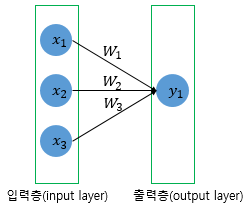

In [ ]:
# Dense()를 사용해 전결합층 하나 더 추가
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력층

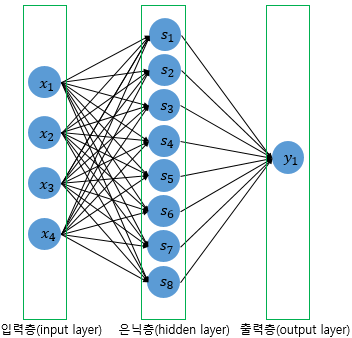

- summary(): 모델의 정보를 요약해서 보여줌

In [ ]:
model.summary()

### 컴파일(Compile)과 훈련(Training)
- compile() : 모델을 기계가 이해할 수 있도록 컴파일
    - 손실 함수와 옵티마이저, 메트릭 함수를 선택
    - optimizer = 훈련 과정을 설정하는 옵티마이저를 설정
    - loss = 훈련 과정에서 사용할 손실 함수(loss function)를 설정
    - metrics = 훈련을 모니터링하기 위한 지표를 선택

In [11]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

vocab_size = 10000
embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

- 대표적으로 사용되는 손실함수, 활성화함수의 조합
    - sparse_categorical_crossentropy는 categorical_crossentropy와 동일하게 다중 클래스 분류에서 사용하지만, 레이블을 원-핫 인코딩하지 않고 정수 인코딩 된 상태에서 수행 가능하다는 점이 다름
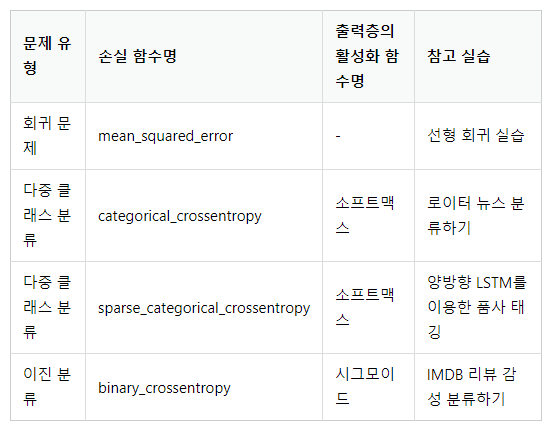

- fit() : 모델을 학습
    - 모델이 오차로부터 매개 변수를 업데이트 시키는 과정을 학습, 훈련, 또는 적합(fitting)
    - 첫번째 인자 = 훈련 데이터에 해당
    - 두번째 인자 = 지도 학습에서 레이블 데이터에 해당
    - epochs = 에포크. 에포크 1은 전체 데이터를 한 차례 훑고 지나갔음을 의미, 훈련 횟수를 정의, 정수값 기재 필요 
    - batch_size = 배치 크기. 기본값은 32. 미니 배치 경사 하강법을 사용하고 싶지 않을 경우에는 batch_size=None을 기재
    - validation_data(x_val, y_val) = 검증 데이터(validation data)를 사용
        - 각 에포크마다 검증 데이터의 정확도나 오차를 함께 출력
        - 훈련이 잘 되고 있는지를 보여줄 뿐, 실제로 모델이 검증 데이터를 학습하는 것은 아님
        - 검증 데이터의 오차(loss)가 낮아지다가 높아지기 시작하면 이는 과적합(overfitting)의 신호
    - validation_split = validation_data와 동일하게 검증 데이터를 사용하기 위한 용도로 validation_data 대신 사용 가능
        - 검증 데이터를 지정하는 것이 아니라 훈련 데이터와 훈련 데이터의 레이블인 X_train과 y_train에서 일정 비율 분리하여 이를 검증 데이터로 사용
    - verbose = 학습 중 출력되는 문구를 설정
        - 0 : 아무 것도 출력하지 않음
        - 1 : 훈련의 진행도를 보여주는 진행 막대를 보여줌
        - 2 : 미니 배치마다 손실 정보를 출력

In [ ]:
# 위의 compile() 코드의 연장선상인 코드
model.fit(X_train, y_train, epochs=10, batch_size=32)

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data(X_val, y_val))

In [ ]:
# 훈련 데이터의 20%를 검증 데이터로 사용.
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2))

In [ ]:
# verbose = 1일 경우.
Epoch 88/100
7/7 [==============================] - 0s 143us/step - loss: 0.1029 - acc: 1.0000

In [ ]:
# verbose = 2일 경우.
Epoch 88/100
 - 0s - loss: 0.1475 - acc: 1.0000

### 평가(Evaluation)와 예측(Prediction)
- evaluate() : 테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가
    - 첫번째 인자 = 테스트 데이터에 해당
    - 두번째 인자 = 지도 학습에서 레이블 테스트 데이터에 해당
    - batch_size = 배치 크기

In [ ]:
# 위의 fit() 코드의 연장선상인 코드
model.evaluate(X_test, y_test, batch_size=32)

- predict() : 임의의 입력에 대한 모델의 출력값을 확인
    - 첫번째 인자 = 예측하고자 하는 데이터
    - batch_size = 배치 크기

In [ ]:
# 위의 fit() 코드의 연장선상인 코드
model.predict(X_input, batch_size=32)

### 모델의 저장(Save)과 로드(Load)
- 모델을 저장한다는 것은 학습이 끝난 신경망의 구조를 보존하고 계속해서 사용할 수 있다는 의미
- save() : 인공 신경망 모델을 hdf5 파일에 저장
- load_model() : 저장해둔 모델을 불러옴

In [ ]:
model.save("model_name.h5")

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("model_name.h5")